<a href="https://colab.research.google.com/github/g-e-mm/IMARTICUS_Notebooks_by_Gem/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# APPROACH TO THE PROBLEM


1. Load the data and the libraries
2. Data preparation and data preprocessing
3. Data Visualization
4. Data Analysis
   1. Uni-Variate Analysis
   2. Bi-Variate (Correlation & Chi-Squared)
   3. Multi-Variate
      1. Supervised
         1. Classification (Y is discrete)
         2. Regression (Y is continuous)
      2. Unsupervised
         1. Clustering
         2. Dimensionality Reduction

# Loading Libraries and Data

Load the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Load the Data

In [ ]:
train = pd.read_csv('/content/train_ctrUa4K (4).csv')
test = pd.read_csv('/content/test_lAUu6dG (4).csv')

# Exploratory Data Analysis

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


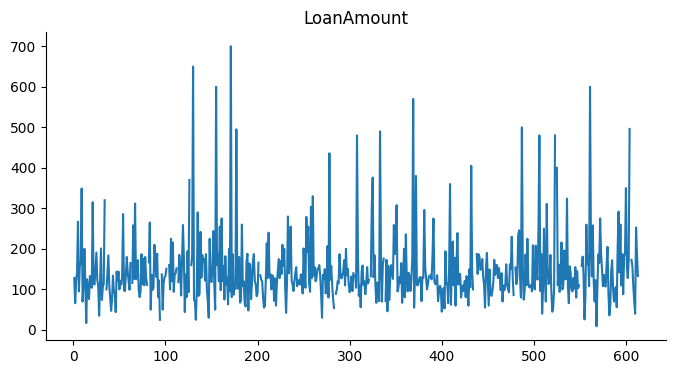

In [ ]:
# @title LoanAmount

from matplotlib import pyplot as plt
train['LoanAmount'].plot(kind='line', figsize=(8, 4), title='LoanAmount')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


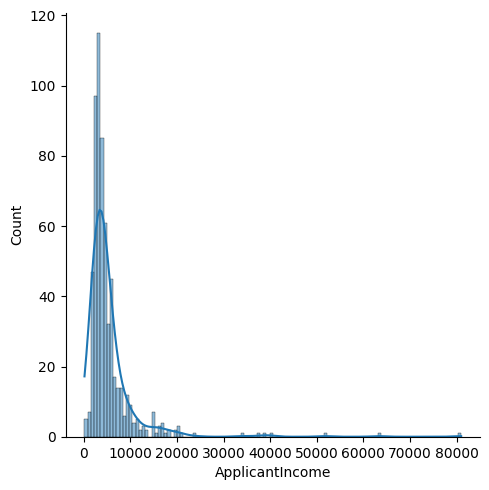

In [ ]:
sns.displot(train['ApplicantIncome'],kde=True)

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

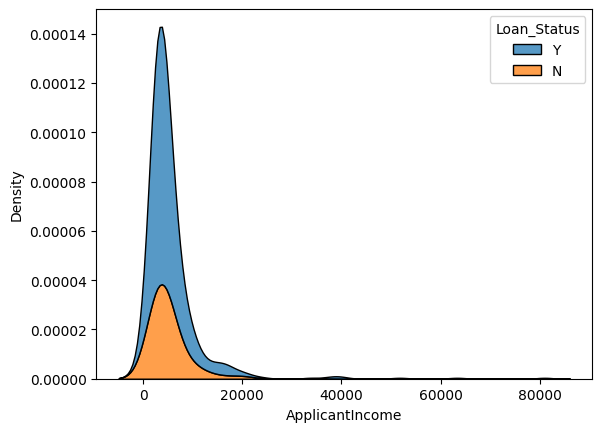

In [ ]:
sns.kdeplot(data=train, x="ApplicantIncome", hue="Loan_Status", multiple="stack")

the overlap in the Y and N of recieving a loan based off of Applicant Income, clearly suggests that there Applicant Income has no relevance to recieving a loan

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

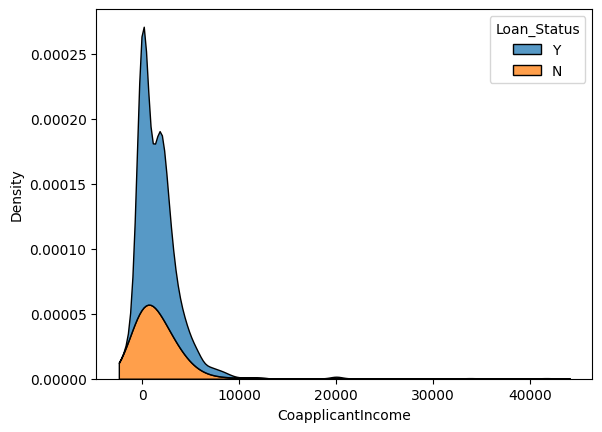

In [ ]:
sns.kdeplot(data=train, x="CoapplicantIncome", hue="Loan_Status", multiple="stack")


<Axes: xlabel='LoanAmount', ylabel='Density'>

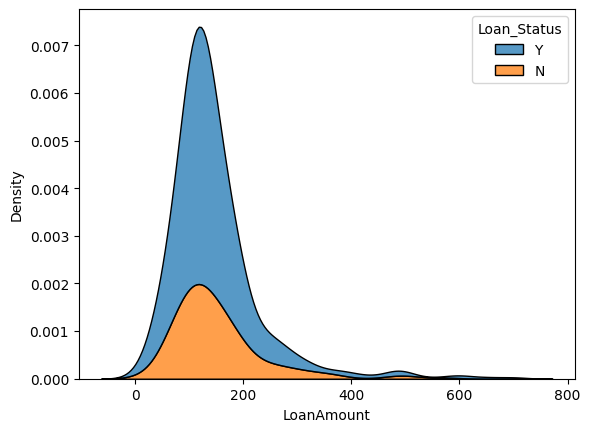

In [ ]:
sns.kdeplot(data=train, x="LoanAmount", hue="Loan_Status", multiple="stack")

<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

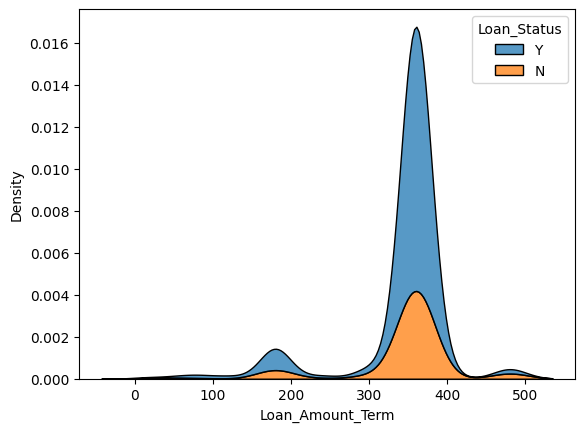

In [ ]:
sns.kdeplot(data=train, x="Loan_Amount_Term", hue="Loan_Status", multiple="stack")

None of these data seem to be impacting the outcome of a person getting a loan, thus this data is Non Linear!

<ipython-input-16-b93d258e6640>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True)


<Axes: >

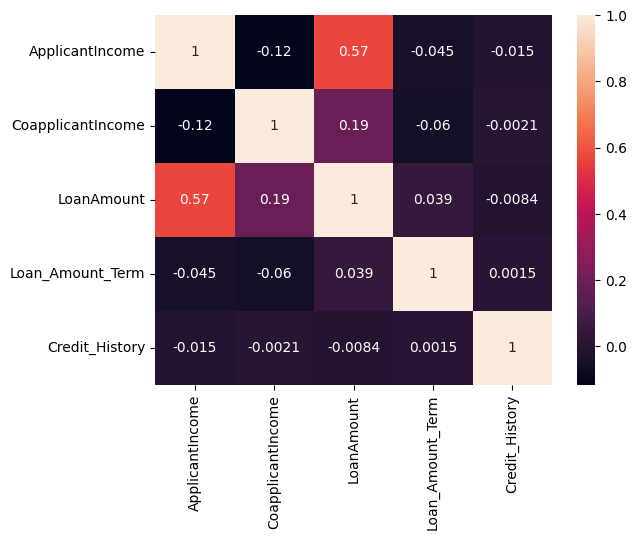

In [ ]:
sns.heatmap(train.corr(), annot=True)

# Bi Variate Analysis

## Hypothesis

*   Null Hypothesis: Gender and Load Status are independent
*   Alternate Hypothesis: Gender and Loan Status are dependent



In [ ]:
from scipy.stats import chi2_contingency
def chi(var1, var2):
  """Check for Categorical Variable Relationship"""
  table = pd.crosstab(var1, var2)
  _,p,_,_ = chi2_contingency(table)
  if p <= 0.05:
    print('Accept the Alternate Hypothesis', round(p,2))
  else:
    print('Failed to reject the null Hypothesis', round(p,2))
  return table

In [ ]:
chi(train['Gender'], train['Loan_Status'])

Failed to reject the null Hypothesis 0.71


Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


Clearly Gender and Loan are dependent

In [ ]:
chi(train['Married'], train['Loan_Status'])

Accept the Alternate Hypothesis 0.03


Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


In [ ]:
chi(train['Dependents'], train['Loan_Status'])

Failed to reject the null Hypothesis 0.37


Loan_Status,N,Y
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


In [ ]:
chi(train['Education'], train['Loan_Status'])

Accept the Alternate Hypothesis 0.04


Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


In [ ]:
chi(train['Self_Employed'], train['Loan_Status'])

Failed to reject the null Hypothesis 1.0


Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


In [ ]:
chi(train['Property_Area'], train['Loan_Status'])

Accept the Alternate Hypothesis 0.0


Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


In [ ]:
chi(train['Credit_History'], train['Loan_Status'])

Accept the Alternate Hypothesis 0.0


Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


# Data Preparation

## Missing Values


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
def data_prep(data):
  """IMPUTES MISSING VALUES AND PREPARES DATA"""
  data['Gender'] = np.where(data['Gender'].isna(), data['Gender'].mode(dropna=True)[0], data['Gender'])
  data['Married'] = np.where(data['Gender'].isna(), data['Married'].mode(dropna=True)[0], data['Gender'])
  data['Dependents'] = np.where(data['Gender'].isna(), data['Dependents'].mode(dropna=True)[0], data['Gender'])
  data['Dependents'].replace('3+',3,inplace=True)
  data['Self_Employed'] = np.where(data['Gender'].isna(), data['Self_Employed'].mode(dropna=True)[0], data['Gender'])
  data['LoanAmount'] = np.where(data['LoanAmount'].isna(), data['LoanAmount'].median(skipna=True), data['LoanAmount'])
  data['Loan_Amount_Term'] = np.where(data['Loan_Amount_Term'].isna(), data['Loan_Amount_Term'].median(skipna=True), data['Loan_Amount_Term'])
   # Fill missing values in Credit_History with a placeholder value (-1)
  data['Credit_History'].fillna(-1, inplace=True)
  data['Credit_History'] = data['Credit_History'].astype('int')
  data['Credit_History'] = np.where(data['Credit_History'].isna(), data['Credit_History'].mode(dropna=True)[0], data['Credit_History'])
  return data

In [ ]:
data_prep(train);
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    int64  
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 62.5+ KB


## ENCODING
Encoding the discrete variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
def encode(data):
  le = LabelEncoder()
  for i in data.columns:
    if data[i].dtype=='object':
      data[i] = le.fit_transform(data[i])
  return data

In [ ]:
encode(train)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,1,1,0,1,5849,0.0,128.0,360.0,1,2,1
1,1,1,1,1,0,1,4583,1508.0,128.0,360.0,1,0,0
2,2,1,1,1,0,1,3000,0.0,66.0,360.0,1,2,1
3,3,1,1,1,1,1,2583,2358.0,120.0,360.0,1,2,1
4,4,1,1,1,0,1,6000,0.0,141.0,360.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1,0,1
610,610,1,1,1,0,1,4106,0.0,40.0,180.0,1,0,1
611,611,1,1,1,0,1,8072,240.0,253.0,360.0,1,2,1
612,612,1,1,1,0,1,7583,0.0,187.0,360.0,1,2,1


for i in train.columns:
  if train[i].dtypes == 'object':
    train[i] = np.where(train[i].isna, train[i].mode(dropna=True), train[i])
  else:
    train[i] = np.where(train[i].isna(), train[i].median(skipna = True), train[i])
train.info()[link text](https://)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int64  
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    int64  
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 62.5 KB


splitting the data into x and y

In [ ]:
x = train.drop(['Loan_ID','Loan_Status'], axis = 1)
y = train["Loan_Status"]

In [ ]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [ ]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,1,0,1,5849,0.0,128.0,360.0,1,2
1,1,1,1,0,1,4583,1508.0,128.0,360.0,1,0
2,1,1,1,0,1,3000,0.0,66.0,360.0,1,2
3,1,1,1,1,1,2583,2358.0,120.0,360.0,1,2
4,1,1,1,0,1,6000,0.0,141.0,360.0,1,2


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 123)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(491, 11)
(123, 11)
(491,)
(123,)


# Applying Multi Variate Model

l1 - blanket co-efficient
l2 - specific co-efficient for when the model goes beyond a threshold

In [ ]:
y_train.head()

579    1
199    0
266    1
309    1
589    0
Name: Loan_Status, dtype: int64

In [ ]:
logreg = LogisticRegression()
#fit the model
logreg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
logreg.coef_

array([[ 9.62505116e-02,  9.62505116e-02,  9.62505116e-02,
        -1.15779765e-01,  9.62505116e-02, -2.82272225e-05,
        -2.19707854e-05,  1.46372569e-03, -6.36594372e-04,
         7.10797065e-01,  1.73650614e-01]])

In [ ]:
logreg.intercept_

array([0.08242595])

In [ ]:
proba_train = logreg.predict_proba(x_train)
proba_train

In [ ]:
y_hat_test = logreg.predict(x_train)
x_hat_test = logreg.predict(x_test)

In [ ]:
y_hat_train

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
conf_matrix_train = confusion_matrix(y_train, y_hat_train)
print(conf_matrix_train)


[[  8 142]
 [ 31 310]]


In [ ]:
print(accuracy_score(y_train, y_hat_train))


0.6476578411405295


In [ ]:
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.21      0.05      0.08       150
           1       0.69      0.91      0.78       341

    accuracy                           0.65       491
   macro avg       0.45      0.48      0.43       491
weighted avg       0.54      0.65      0.57       491



In [ ]:
print(classification_report(y_test, y_hat_test))

ValueError: Found input variables with inconsistent numbers of samples: [123, 491]